# Capstone2 Exploratory Data Analysis for Mental Health Dataset - Version 3

The objective of this EDA version 3 is to examine the duplicate records in the Mental Health dataset.

Model training yielded outstanding performance when duplicates were included, particularly with XGBoost, achieving 100% across the precision-recall curve scores.

This analysis aims to determine whether retaining duplicate records skews model performance. We will assess if removing duplicates reduces potential noise, or bias and overfitting introduced by these repeated patterns.

In [324]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [325]:
import os, sys
import pandas as pd

import matplotlib.pyplot as plt

# Import 'libs' directory
libs_path = os.path.join(os.getcwd(), '../libs')
sys.path.append(libs_path)

%autoreload 2
import eda
import data_utils as utils

pd.set_option('display.max_columns', None)

## Load Dataset

In [326]:
mh_df = pd.read_csv('../data/MentalHealthDataset.csv')

In [327]:
df = mh_df.copy()

## Inspect Dataset 

In [328]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292364 entries, 0 to 292363
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Timestamp                292364 non-null  object
 1   Gender                   292364 non-null  object
 2   Country                  292364 non-null  object
 3   Occupation               292364 non-null  object
 4   self_employed            287162 non-null  object
 5   family_history           292364 non-null  object
 6   treatment                292364 non-null  object
 7   Days_Indoors             292364 non-null  object
 8   Growing_Stress           292364 non-null  object
 9   Changes_Habits           292364 non-null  object
 10  Mental_Health_History    292364 non-null  object
 11  Mood_Swings              292364 non-null  object
 12  Coping_Struggles         292364 non-null  object
 13  Work_Interest            292364 non-null  object
 14  Social_Weakness     

### Create New Features from Time Components.

In [329]:
df = mh_df.copy()
# Timestamp 
# Create features from time component
utils.pre_process_timestamp(df)
# Drop timestamp
df.drop(columns='Timestamp', inplace=True)

In [330]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292364 entries, 0 to 292363
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Gender                   292364 non-null  object
 1   Country                  292364 non-null  object
 2   Occupation               292364 non-null  object
 3   self_employed            287162 non-null  object
 4   family_history           292364 non-null  object
 5   treatment                292364 non-null  object
 6   Days_Indoors             292364 non-null  object
 7   Growing_Stress           292364 non-null  object
 8   Changes_Habits           292364 non-null  object
 9   Mental_Health_History    292364 non-null  object
 10  Mood_Swings              292364 non-null  object
 11  Coping_Struggles         292364 non-null  object
 12  Work_Interest            292364 non-null  object
 13  Social_Weakness          292364 non-null  object
 14  mental_health_interv

### Analyze Temporal Features

In [331]:
# Shapiro-wilk test for normal distribution
eda.hypothesis_testing(df)

year - Shapiro-Wilk test p-value: 0.000000000
month - Shapiro-Wilk test p-value: 0.000000000
day - Shapiro-Wilk test p-value: 0.000000000
hour - Shapiro-Wilk test p-value: 0.000000000
minute - Shapiro-Wilk test p-value: 0.000000000


/Users/judesantos/miniconda3/envs/mlenv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 292364.
  res = hypotest_fun_out(*samples, **kwds)


What's happening to the time components having no continuous distribution.

### Inspect Timestamps and Duplications

In [332]:
# Let's check the raw dataset for the time component's uniqueness.
mh_df.Timestamp.nunique()

580

The survey times are not normally distributed. Only 580 unique timestamps across 290K records. This suggests that records were added in batches, possibly as part of a grouped or batched process.

Batched timestamps may not be relevant as a direct feature, because it does not provide insights about each records time context.

Let's remove Timestamp from our feature list and check how it affects our dataset.

In [333]:
# Let's create a temporary copy from the raw data just for the timestamp analysis.
ts_test_df = mh_df.copy()
# First, get the duplication count
duplicated = ts_test_df.duplicated()
df[duplicated != False]

,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options,year,month,day,hour,minute
18271,Female,United States,Corporate,NaN,No,Yes,31-60 days,No,No,Maybe,High,No,No,Maybe,No,Not sure,2014,8,27,11,29
18272,Female,United States,Corporate,NaN,Yes,Yes,31-60 days,No,No,Maybe,High,No,No,Maybe,No,No,2014,8,27,11,31
18273,Female,United States,Corporate,NaN,Yes,Yes,31-60 days,No,No,Maybe,High,No,No,Maybe,No,Yes,2014,8,27,11,32
18274,Female,United States,Corporate,No,Yes,Yes,31-60 days,No,No,Maybe,High,No,No,Maybe,Maybe,Yes,2014,8,27,11,37
18275,Female,United States,Corporate,No,Yes,Yes,31-60 days,No,No,Maybe,High,No,No,Maybe,No,Yes,2014,8,27,11,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291817,Male,United States,Business,No,No,No,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,No,2014,8,27,12,33
291832,Male,United States,Business,No,No,No,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,No,2014,8,27,12,39
291837,Male,United States,Business,No,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,No,2014,8,27,12,42
291953,Male,United States,Business,No,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,Yes,2014,8,27,15,26


2313 records are duplicates,

Drop the Timestamp column and observe what happens.

In [334]:
# Now let's drop the time components
_test_dups_df = ts_test_df.drop(columns='Timestamp')
# Again, check for duplicates
duplicated = _test_dups_df.duplicated()
_test_dups_df[duplicated != False]

,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
9,Female,United States,Corporate,No,No,No,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
11,Female,United States,Corporate,No,No,No,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
12,Female,United States,Corporate,No,No,No,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
18,Female,United States,Corporate,No,No,No,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
21,Female,Canada,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292357,Male,Australia,Business,No,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,Yes
292358,Male,United States,Business,No,No,No,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,Maybe,Not sure
292361,Male,United States,Business,No,Yes,No,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,No
292362,Male,United States,Business,No,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,Yes


In [335]:
_test_dups_df

,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292359,Male,United States,Business,Yes,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,Maybe,Not sure
292360,Male,South Africa,Business,No,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,Yes
292361,Male,United States,Business,No,Yes,No,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,No
292362,Male,United States,Business,No,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,Yes


Duplicates increased from 2313 to over 194,000. The time component is used only to differentiate duplicates. 

How are these duplicates distributed among the population. Let's group by timestamp and country, then check for duplicates.

In [336]:
ts_test_df['Timestamp'] = pd.to_datetime(ts_test_df['Timestamp'])

aggregated_df = ts_test_df.groupby(['Timestamp'])
groups = aggregated_df.groups

#groups
total_dups = 0
group_dups = 0 

for name in groups:
    group = aggregated_df.get_group((name,))
    dups = group.duplicated().sum()
    if dups != 0:
        print(f'Group: {name}, Countries: {group.Country.unique()}, duplicates: {dups}')
        total_dups += dups
        group_dups += 1

print(f'\nTotal Duplicates: {total_dups}, Groups with Duplicates: {group_dups} out of {len(groups)}')

Group: 2014-08-27 11:29:00, Countries: ['United States' 'Canada' 'United Kingdom'], duplicates: 3
Group: 2014-08-27 11:31:00, Countries: ['United States'], duplicates: 3
Group: 2014-08-27 11:32:00, Countries: ['United States' 'Canada'], duplicates: 3
Group: 2014-08-27 11:37:00, Countries: ['United States'], duplicates: 3
Group: 2014-08-27 11:43:00, Countries: ['United States' 'Canada' 'Netherlands' 'United Kingdom'], duplicates: 3
Group: 2014-08-27 11:49:00, Countries: ['Poland'], duplicates: 3
Group: 2014-08-27 11:51:00, Countries: ['Australia' 'United States'], duplicates: 3
Group: 2014-08-27 11:52:00, Countries: ['United States'], duplicates: 3
Group: 2014-08-27 12:18:00, Countries: ['United States'], duplicates: 3
Group: 2014-08-27 12:33:00, Countries: ['United States' 'Canada'], duplicates: 390
Group: 2014-08-27 12:37:00, Countries: ['United States' 'United Kingdom'], duplicates: 3
Group: 2014-08-27 12:39:00, Countries: ['United States'], duplicates: 393
Group: 2014-08-27 12:40:00

After grouping records by Timestamp and Country, the same timestamps are repeated across different countries. This indicates that the batch operation was likely performed simultaneously for the grouped countries.

In each of the grouped entities, occurrences of duplication is recorded: Most groups have 3 duplicates, and one group **'2014-08-27 12:33:00'** having 390 duplicates. 

Inspect one of the groups and observe how the duplications occur.

In [337]:
ts_subs_df = ts_test_df[ts_test_df['Timestamp'] == '2014-08-27 11:29:00']
duplicated = ts_subs_df.duplicated()
ts_subs_df[duplicated != False]

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
18271,2014-08-27 11:29:00,Female,United States,Corporate,NaN,No,Yes,31-60 days,No,No,Maybe,High,No,No,Maybe,No,Not sure
19844,2014-08-27 11:29:00,Female,United States,Others,NaN,No,Yes,31-60 days,Yes,Maybe,Yes,High,Yes,Yes,No,No,Not sure
51788,2014-08-27 11:29:00,Female,United States,Student,NaN,No,Yes,More than 2 months,Yes,Maybe,Maybe,High,No,Maybe,No,No,Not sure


The group which was logged at **'2014-08-27 11:29:00'** shows the duplication occurs by country.

Insight: Is it worth worth keeping these duplicates? How is this going to affect prediction?

Keeping duplicate records with identical timestamps across countries can impact predictions:

1. **Introduces bias in model training:** Skews predictions by giving undue importance to the patterns in the duplicated records
2. **Reduces Generalizability:** Training on repeated patterns may weaken a model's ability to generalize and perform poorly on unseen data.
3. **Overfitting:** The model may perform well on training data but poorly on new data.

There are **194641** duplicate records. After dropping the duplicate records, we now have **97723** unique ovservations.

We will train 2 baseline models. The first one having trained on a dataset with the duplicates, the second model with a lower number of unique observations as a result of removing the duplicates, and see how they compare in metrics.

### First, let's prepare the dataset through pre-processing for model training.

In [338]:
# First let's get a new copy of the raw dataset
df = mh_df.copy()

In [339]:
# Drop the timestamp column and keep the duplicates for our initial tests.
df.drop(columns='Timestamp', inplace=True)

In [340]:
# Change target ('treatment') dtype from bool to int
#

target = 'treatment'
df[target] = df[target].apply(lambda x: utils.MentalHealthData.yes_no_num.get(x, x))

In [341]:
# Feature 'self_employed' - fillna with value 'Unknown' 
#

df['self_employed'] = df['self_employed'].fillna('Unknown')

# convert 'Yes', 'No' to 1, 0 - Coping_Struggles, family_history, treatment
#

for col in df:
    if len(df[col].unique()) == 2 and col != 'Gender':
        df[col] = df[col].apply(lambda x: utils.MentalHealthData.yes_no_num.get(x, x))

In [342]:
# One-hot encoding the rest of the features

df = eda.feature_preparation(df, target=target)

Data Transformation:
Feature Engineering:


In [343]:
df

,family_history,treatment,Coping_Struggles,Gender_Male,Country_Belgium,Country_Bosnia_and_Herzegovina,Country_Brazil,Country_Canada,Country_Colombia,Country_Costa_Rica,Country_Croatia,Country_Czech_Republic,Country_Denmark,Country_Finland,Country_France,Country_Georgia,Country_Germany,Country_Greece,Country_India,Country_Ireland,Country_Israel,Country_Italy,Country_Mexico,Country_Moldova,Country_Netherlands,Country_New_Zealand,Country_Nigeria,Country_Philippines,Country_Poland,Country_Portugal,Country_Russia,Country_Singapore,Country_South_Africa,Country_Sweden,Country_Switzerland,Country_Thailand,Country_United_Kingdom,Country_United_States,Occupation_Corporate,Occupation_Housewife,Occupation_Others,Occupation_Student,self_employed_Unknown,self_employed_Yes,Days_Indoors_15-30_days,Days_Indoors_31-60_days,Days_Indoors_Go_out_Every_day,Days_Indoors_More_than_2_months,Growing_Stress_No,Growing_Stress_Yes,Changes_Habits_No,Changes_Habits_Yes,Mental_Health_History_No,Mental_Health_History_Yes,Mood_Swings_Low,Mood_Swings_Medium,Work_Interest_No,Work_Interest_Yes,Social_Weakness_No,Social_Weakness_Yes,mental_health_interview_No,mental_health_interview_Yes,care_options_Not_sure,care_options_Yes
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,1,1,0,0,1,1,0,1,0
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,1,1,0,0,1,1,0,0,0
2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,1,1,0,0,1,1,0,0,1
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,0,0,1,0,0,0,1
4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292359,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0
292360,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1
292361,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0
292362,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1


After processing, we now have 64 features with 292,364 records.

## Comparative Analysis

##### Model Training and Evaluation Strategy:

- **Model Selection:** Use Logistic Regression without hyperparameter tuning.
- **Cross-Validation:** Implement Stratified K-Fold Cross-Validation with 15 folds, calculating average predictions across folds to ensure balanced class distributions.
- **Performance Metrics:**
  - Display the Confusion Matrix based on cross-validated predictions.
  - Generate a comprehensive Classification Report with precision, recall, and F1-score for each class.
  - Show Cross-Validation scores across folds and compute the mean for overall model performance.
- **Visualizations:**
  - Plot the Precision-Recall curve, marking the optimal threshold with a red dot for clarity.
  - Plot the ROC Curve with the calculated ROC-AUC score to assess model discrimination.

This ensures clear insights into the model's performance on both individual metrics and overall cross-validation stability.

### Model with duplicate records

Contains over 292K records with 2313 duplicates.

Note that duplicate records will be excluded from the test datasets, ensuring none are copied over. The training datasets, however, will retain the original records along with their duplicates.

In [302]:
# Make a copy of our duplicated DF for comparison testing later.
duplicated_df = df.sample(frac=0.334) # Match the size of the deduplicated dataset

mh_o = eda.MentalHealthData(duplicated_df, target, utils.random_state)

#### Logistic Regression


Confusion Matrix (Treatment Required):
 No: [33849 14422]
Yes: [13354 36025]

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.70      0.71     48271
           1       0.71      0.73      0.72     49379

    accuracy                           0.72     97650
   macro avg       0.72      0.72      0.72     97650
weighted avg       0.72      0.72      0.72     97650

Cross-V Mean Score: 0.7155
Cross-V Scores:
[0.70867738 0.71299531 0.71695208 0.7248654  0.71053874 0.72576519
 0.7187223  0.71658351 0.70386643 0.71548397 0.71640975 0.71563003
 0.71127503 0.71483797 0.7195705 ]


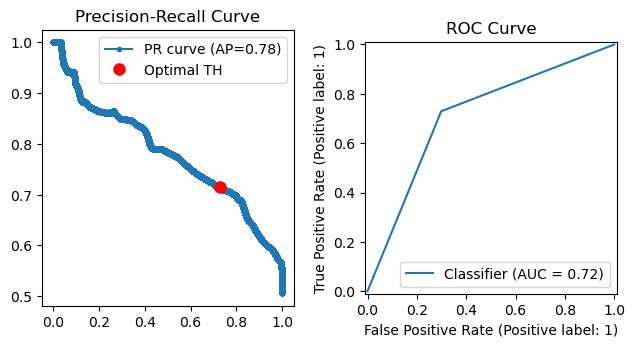

In [ ]:
# Train model, get metrics
from sklearn.linear_model import LogisticRegression
# Reusable method: Create and return a new instance of LR model.
def get_lr_model():
  return LogisticRegression(
    max_iter=3000,
    n_jobs=-1,
    random_state=utils.random_state
  )
# Run evaluaton, print results
eda.model_evaluation_test(mh_o, target, get_lr_model())

### Model training on deduplicated records

In [344]:
# Let us begin with the second evaluation exercise by first removing the duplicates.

# Count duplicates
duplicated = df.duplicated()
# Show duplicates
df[duplicated != False]

,family_history,treatment,Coping_Struggles,Gender_Male,Country_Belgium,Country_Bosnia_and_Herzegovina,Country_Brazil,Country_Canada,Country_Colombia,Country_Costa_Rica,Country_Croatia,Country_Czech_Republic,Country_Denmark,Country_Finland,Country_France,Country_Georgia,Country_Germany,Country_Greece,Country_India,Country_Ireland,Country_Israel,Country_Italy,Country_Mexico,Country_Moldova,Country_Netherlands,Country_New_Zealand,Country_Nigeria,Country_Philippines,Country_Poland,Country_Portugal,Country_Russia,Country_Singapore,Country_South_Africa,Country_Sweden,Country_Switzerland,Country_Thailand,Country_United_Kingdom,Country_United_States,Occupation_Corporate,Occupation_Housewife,Occupation_Others,Occupation_Student,self_employed_Unknown,self_employed_Yes,Days_Indoors_15-30_days,Days_Indoors_31-60_days,Days_Indoors_Go_out_Every_day,Days_Indoors_More_than_2_months,Growing_Stress_No,Growing_Stress_Yes,Changes_Habits_No,Changes_Habits_Yes,Mental_Health_History_No,Mental_Health_History_Yes,Mood_Swings_Low,Mood_Swings_Medium,Work_Interest_No,Work_Interest_Yes,Social_Weakness_No,Social_Weakness_Yes,mental_health_interview_No,mental_health_interview_Yes,care_options_Not_sure,care_options_Yes
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,0,0,1,1,0,0,0
11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,0,0,1,1,0,1,0
12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,0,0,1,1,0,0,0
18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,0,0,1,1,0,1,0
21,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292357,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1
292358,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0
292361,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0
292362,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1


Filtering out the duplicates, we are down to 194,641 records.

In [345]:
# Now let's acutally drop the duplicates
df = df[duplicated == False]
df

,family_history,treatment,Coping_Struggles,Gender_Male,Country_Belgium,Country_Bosnia_and_Herzegovina,Country_Brazil,Country_Canada,Country_Colombia,Country_Costa_Rica,Country_Croatia,Country_Czech_Republic,Country_Denmark,Country_Finland,Country_France,Country_Georgia,Country_Germany,Country_Greece,Country_India,Country_Ireland,Country_Israel,Country_Italy,Country_Mexico,Country_Moldova,Country_Netherlands,Country_New_Zealand,Country_Nigeria,Country_Philippines,Country_Poland,Country_Portugal,Country_Russia,Country_Singapore,Country_South_Africa,Country_Sweden,Country_Switzerland,Country_Thailand,Country_United_Kingdom,Country_United_States,Occupation_Corporate,Occupation_Housewife,Occupation_Others,Occupation_Student,self_employed_Unknown,self_employed_Yes,Days_Indoors_15-30_days,Days_Indoors_31-60_days,Days_Indoors_Go_out_Every_day,Days_Indoors_More_than_2_months,Growing_Stress_No,Growing_Stress_Yes,Changes_Habits_No,Changes_Habits_Yes,Mental_Health_History_No,Mental_Health_History_Yes,Mood_Swings_Low,Mood_Swings_Medium,Work_Interest_No,Work_Interest_Yes,Social_Weakness_No,Social_Weakness_Yes,mental_health_interview_No,mental_health_interview_Yes,care_options_Not_sure,care_options_Yes
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,1,1,0,0,1,1,0,1,0
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,1,1,0,0,1,1,0,0,0
2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,1,1,0,0,1,1,0,0,1
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,0,0,1,0,0,0,1
4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292342,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0
292350,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,1
292355,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0
292359,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0


In [346]:
# Check if any more duplicates
duplicated = df.duplicated()
df[duplicated != False]

,family_history,treatment,Coping_Struggles,Gender_Male,Country_Belgium,Country_Bosnia_and_Herzegovina,Country_Brazil,Country_Canada,Country_Colombia,Country_Costa_Rica,Country_Croatia,Country_Czech_Republic,Country_Denmark,Country_Finland,Country_France,Country_Georgia,Country_Germany,Country_Greece,Country_India,Country_Ireland,Country_Israel,Country_Italy,Country_Mexico,Country_Moldova,Country_Netherlands,Country_New_Zealand,Country_Nigeria,Country_Philippines,Country_Poland,Country_Portugal,Country_Russia,Country_Singapore,Country_South_Africa,Country_Sweden,Country_Switzerland,Country_Thailand,Country_United_Kingdom,Country_United_States,Occupation_Corporate,Occupation_Housewife,Occupation_Others,Occupation_Student,self_employed_Unknown,self_employed_Yes,Days_Indoors_15-30_days,Days_Indoors_31-60_days,Days_Indoors_Go_out_Every_day,Days_Indoors_More_than_2_months,Growing_Stress_No,Growing_Stress_Yes,Changes_Habits_No,Changes_Habits_Yes,Mental_Health_History_No,Mental_Health_History_Yes,Mood_Swings_Low,Mood_Swings_Medium,Work_Interest_No,Work_Interest_Yes,Social_Weakness_No,Social_Weakness_Yes,mental_health_interview_No,mental_health_interview_Yes,care_options_Not_sure,care_options_Yes


After dropping the duplicates, we are now down to 97,723 unique observations.

Let's get modeling!

In [347]:
# Make a copy of the deduplicated DF for comparison testing later.
deduplicated_df = df.copy()
# Create a new data instance after running feature-engineering, transformation, and train_test_split.
mh_o = eda.MentalHealthData(deduplicated_df, target, utils.random_state)

### Logistic Regression


Confusion Matrix (Treatment Required):
 No: [33934 16416]
Yes: [15130 32243]

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.67      0.68     50350
           1       0.66      0.68      0.67     47373

    accuracy                           0.68     97723
   macro avg       0.68      0.68      0.68     97723
weighted avg       0.68      0.68      0.68     97723

Cross-V Mean Score: 0.6717
Cross-V Scores:
[0.57784042 0.57769675 0.67334086 0.74340117 0.71992438 0.67667222
 0.67135395 0.67239721 0.6717028  0.67884784 0.67800806 0.67877244
 0.68359329 0.68531273 0.68653294]


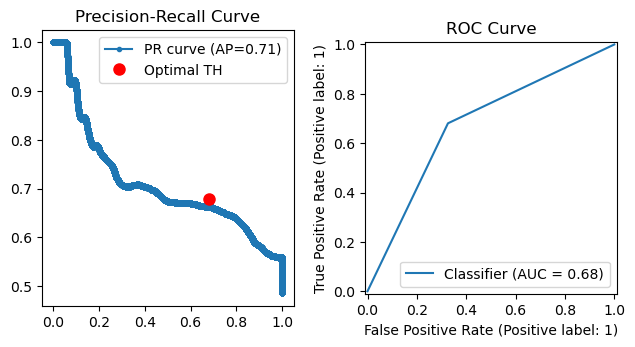

In [ ]:
# Run our second evaluation without the duplicates in the dataset.
eda.model_evaluation_test(mh_o, target, get_lr_model())


The second test, conducted after removing duplicates, showed a notable decline in performance:

- The Mean Cross-Validation Score dropped from 0.7155 to 0.6717.
- Accuracy decreased from 0.72 to 0.68.
- The F1 Score fell from 0.72 to 0.67.

These results suggest that the presence of duplicates in the first test introduced bias, leading our model to overfit.

To validate this hypothesis, we need to confirm the extent of bias in our dataset.

### Chi-Squared Test for Bias.

The Chi-Square test for categorical features is used to assess whether the distribution of categories in each feature is significantly different between the duplicated and deduplicated datasets.

- A higher Chi-Square value suggests a larger deviation between observed and expected frequencies, indicating a significant difference in category distributions.

- A small p-value (e.g., < 0.05) suggests that the distributions are significantly different, implying that duplicates might have skewed the feature’s distribution.


In [228]:
chi2_df = eda.chi2_comparison(duplicated_df, deduplicated_df)
chi2_df

,chi2,p_value
Country_United_States,20037.983148,0.000000
self_employed_Yes,5749.973745,0.000000
mental_health_interview_No,4620.846610,0.000000
mental_health_interview_Yes,2167.158885,0.000000
Country_Canada,1754.981162,0.000000
...,...,...
Social_Weakness_Yes,0.040142,0.841204
Mental_Health_History_Yes,0.040043,0.841397
Days_Indoors_Go_out_Every_day,0.027535,0.868207
Social_Weakness_No,0.020312,0.886668


The top five entries reveal very high chi-square scores with p-values at 0 - well below the significance threshold of 0.05, indicating significant differences in category distributions due to duplicates.

#### How Each Identified Feature Contributes to the High Bias:

- **Country_United_States:** Overrepresented at approximately 60% of the total dataset, this feature skews the model to “memorize” patterns specific to the United States. This strong bias means the model will likely perform well on U.S.-based data but poorly on data from other countries, limiting its generalizability.

- **self_employed_Yes:** With a substantial imbalance between self-employed individuals (7.5% of the population, 29,168 records) and those who are not (257,994 records), the model may overfit to patterns prevalent in non-self-employed groups. This imbalance can bias the model, causing it to underperform on self-employed individuals.

- **mental_health_interview (No/Yes):** An imbalance here (232,166 “No” responses versus 8,624 “Yes”) introduces bias, as the model may learn to predict “No” by default, ignoring patterns specific to individuals who have had a mental health interview.

- **Country_Canada:** Representing 6.3% of the dataset (18,726 entries), this feature, while the third most common country, still holds less influence than the United States. The imbalance might cause the model to overlook patterns specific to Canadian respondents.

### Conclusion
These findings confirm that duplicate records have significantly biased the dataset, particularly in favor of certain groups. Proceeding without the duplicates should help reduce this bias and improve the model’s generalization ability across diverse populations.